In [2]:
%cd /data/jupyter/root/ECNU/DataMining/L13-LocationBasedAanlysis/

/data/jupyter/root/ECNU/DataMining/L13-LocationBasedAanlysis


In [3]:
# from __future__ import divisiona
import os, sys

# 启动绘图
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
import codecs
import csv
import warnings
warnings.filterwarnings('ignore')

import operator

In [5]:
data = pd.read_excel("data/business_circle.xls", index_col=u'基站编号')
data.head()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
基站编号,,,,
36902,78,521,602,2863
36903,144,600,521,2245
36904,95,457,468,1283
36905,69,596,695,1054
36906,190,527,691,2051


In [6]:
# max-min normalization
data = (data - data.min())/(data.max() - data.min())
data = data.reset_index()
data.head()

,基站编号,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
0,36902,0.103865,0.856364,0.850539,0.169153
1,36903,0.263285,1.000000,0.725732,0.118210
2,36904,0.144928,0.740000,0.644068,0.038909
3,36905,0.082126,0.992727,0.993837,0.020031
4,36906,0.374396,0.867273,0.987673,0.102217


# 构建商圈聚类模型

## 谱系聚类图

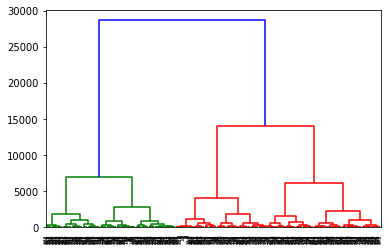

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(data, method='ward', metric='euclidean')
P = dendrogram(Z)
plt.show()

## 层次聚类模型结果

In [44]:
data = pd.read_excel('data/standardized.xls', index_col= u'基站编号')

In [45]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [46]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)
r.columns = list(data.columns) + [u'聚类类别']
r.head()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量,聚类类别
基站编号,,,,,
36902,0.103865,0.856364,0.850539,0.169153,1
36903,0.263285,1.000000,0.725732,0.118210,1
36904,0.144928,0.740000,0.644068,0.038909,1
36905,0.082126,0.992727,0.993837,0.020031,1
36906,0.374396,0.867273,0.987673,0.102217,1


In [48]:
r.tail()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量,聚类类别
基站编号,,,,,
35562,0.125604,0.081818,0.291217,0.608771,0
38624,0.152174,0.072727,0.354391,0.590718,0
36017,0.205314,0.003636,0.129430,0.973539,0
38827,0.154589,0.089091,0.118644,0.927129,0
37787,0.154589,0.001818,0.329738,0.802984,0


## 折线图

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


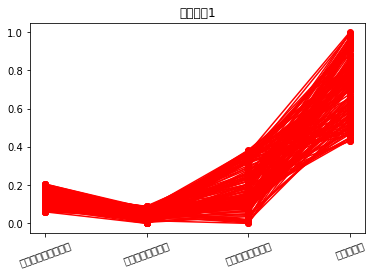

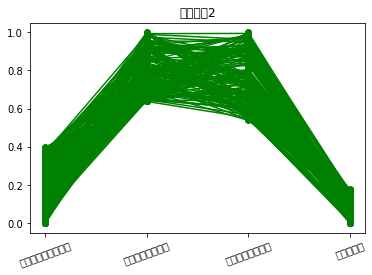

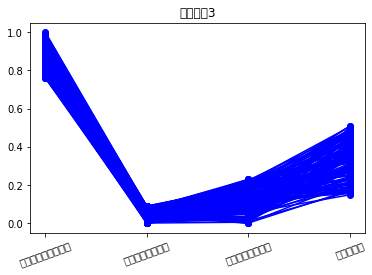

In [51]:
plt.rcParams['font.sans-serif'] = ['SimHeabsi'] # show chineseabs
plt.rcParams['axes.unicode_minus'] = False

style = ['ro-', 'go-', 'bo-']
xlabels = ['工作日人均停留时间', '凌晨人均停留时间', '周末人均停留时间', '日均人流量']
pic_output = 'data/type_jzg'

for i in range(3):
    plt.figure()
    tmp = r[r[u'聚类类别'] == i].iloc[:, :4]
    for j in range(len(tmp)):
        plt.plot(range(1, 5), tmp.iloc[j], style[i])
    plt .xticks(range(1, 5), xlabels, rotation = 20)
    plt.title('商圈类别%s' % (i + 1))
    plt.subplots_adjust(bottom=0.15)
    plt.savefig(u'%s%s.png'%(pic_output, i+1))
    